In [149]:
import numpy as np
import matplotlib.pyplot as plt


def get_random_covariance(d):
    sigma = np.random.rand(d, d) - 0.5
    sigma = np.dot(sigma, sigma.T)
    return sigma

def get_random_gaussian_dist(d):
    sigma = get_random_covariance(d)
    mu = np.array(np.random.rand(d))*10
    return mu,sigma

def generate_normal_datapoint(guaussian_dist):
    mean = guaussian_dist[0]
    cov = guaussian_dist[1]
    dp = np.random.multivariate_normal(mean, cov,  check_valid='warn', tol=1e-8)
    return dp

def generate_gaussian_cluster(guaussian_dist,k, dataset = None):
    cluster = np.empty((0,3))
    for i in range(k):
        p = generate_normal_datapoint(guaussian_dist)
        cluster = np.append(cluster,[p],axis=0)
    if dataset:
        dataset = np.append(dataset,cluster)
    return cluster


In [150]:
p = generate_gaussian_cluster(get_random_gaussian_dist(3), 200)
print(p)

[[7.85423867 3.02322934 2.96043343]
 [7.14215131 2.85071096 2.95393882]
 [8.13248141 2.48651127 4.04482324]
 [7.82572951 2.42270445 4.13775184]
 [6.91578367 3.22951978 3.95257057]
 [7.76815811 2.75536595 4.02170311]
 [7.32961021 2.78748072 3.76300719]
 [7.35117895 2.4898294  2.8163772 ]
 [7.10991106 2.7776722  4.25286531]
 [7.23773552 2.43200345 2.69342339]
 [6.92804971 2.90609246 3.81439592]
 [6.99348527 2.94264186 3.21418895]
 [7.10222503 2.94191001 4.50504725]
 [8.53730018 2.38559112 4.05164291]
 [7.51548869 2.73024396 3.30809584]
 [7.69367392 2.59415367 3.41840125]
 [7.83905742 2.38425207 4.24435941]
 [7.18560584 2.57686439 4.22390203]
 [7.5141465  2.58329864 3.95931838]
 [7.36176323 2.77524203 3.78086947]
 [7.57719135 2.82645271 2.91183185]
 [7.34667199 2.55138337 3.32919128]
 [7.42820977 2.86118203 4.13104048]
 [7.92033536 2.73438695 2.34075792]
 [7.57125337 2.7254117  4.16963655]
 [7.61143144 2.62769238 3.26288009]
 [7.30100105 2.68374071 3.51409684]
 [7.19386015 2.92657546 2.63

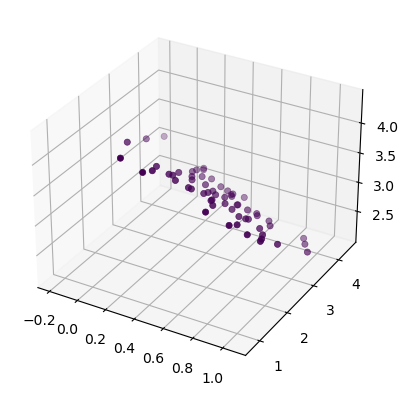

In [151]:
def visualize_3D(data, color):

    ax = plt.axes(projection='3d')
    ax.scatter(p[:,0],p[:,1],p[:,2], c=[color]*len(data), cmap='viridis', linewidth=0.5)
#
p = generate_gaussian_cluster(get_random_gaussian_dist(3), 60)
visualize_3D(p,1)



In [159]:
d = 3
k =6
n =60
clusters = np.empty((0,n,d))
# for k clusters:
for i in range (k):
    cluster = generate_gaussian_cluster(get_random_gaussian_dist(d),n)
    clusters = np.append(clusters,[cluster], axis=0)

print(clusters.shape)


(6, 60, 3)


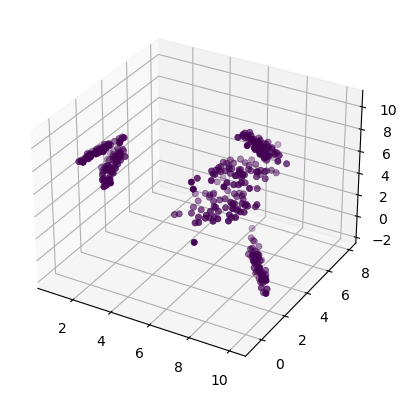

In [160]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3D_clusters(clusters):
    # initialize the color for plotting clusters
    color = 0

    # create a new figure and set up a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # iterate through each cluster
    for cluster in clusters:
        # scatter plot the points in the current cluster with the current color
        # set the colormap to 'viridis' and linewidth to 0.5
        ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], c=[color]*len(cluster), cmap='viridis', linewidth=0.5)
        # increment the color value for the next cluster
        color += 10

    # show the plot
    plt.show()

# Example usage of the function
# visualize the cluster
visualize_3D_clusters(clusters)